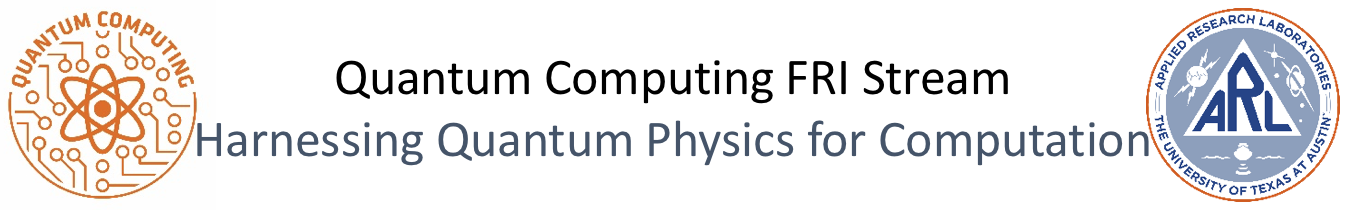

# Introduction to Qiskit
## Lesson 2

## Today's Objectives

Today's goal is to familiarize ourselves with the basic tools for the course including:
 - Google Colab (and .ipynb notebooks)
 - Python
 - Qiskit

To accomplish this, we will:
 - Write Python scripts
 - Write quantum scripts using Qiskit!
 - Translate a quantum circuit from the composer into Qiskit code!
 - Use Qiskit to implement a given quantum algorithm

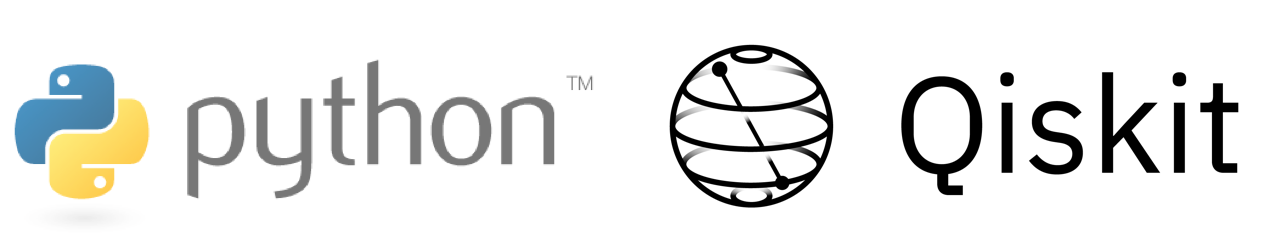

## Colab



You will need a Google account. If you do not have one or you want a separate one for "official business," create one now at accounts.google.com

Proceed to [https://colab.research.google.com/](https://colab.research.google.com/) to work with ipynb files online.

Upload today's notebook, and we're ready to go!

Though the cloud should save your work automatically, it doesn't hurt to save manually. You will also need to download your notebook in order to submit it to Canvas assignments.


**Notebooks give us the ability to work with code, text, and images all imbedded in the same document. This will be our primary medium for the course.**




## Hello Notebooks and Python


Code cells contain commands written in some programming language (Python 3 by default).

Press Shift+Enter or click the play button on the selected cell to execute that code cell.

Practice on the cell below.

In [58]:
print("Hello Class!")

Hello Class!


You can create your own text and code cells by using the Insert menu, clicking the "+Code" and "+Text" buttons below the menus, or by clicking the option while mousing over the top or bottom border of an existing cell.

### <font color=green> Exercise </font>

Create and execute a code cell that prints a greeting.

Create a text cell that contains some fact you know related to quantum sciences.

In [59]:
print('Hello !')

Hello !


- Researchers use squeezed light for sensors research 

## Qiskit

QISKit is an open source SDK (software development kit) written for the Python programming language.

It can be used to run quantum circuits locally (on a simulator) or remotely (on a simulator or hardware backend).


### Installing Qiskit


In a Code cell in your notebook, enter:

> __%pip install qiskit__

As long as you’re connected to the Internet, it should work just fine.

<font color = blue> The percentage sign let's the notebook know this is a special command that affects the kernel. It is not necessary if you are doing this in a command prompt. </font>

In [60]:
%pip install qiskit

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Hello, IBMQ


If you haven’t yet, create an account at https://quantum-computing.ibm.com/


### To associate your notebook with your account



We need a few more tools to link to IBM.

In [61]:
%pip install qiskit_ibm_runtime

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [62]:
from qiskit_ibm_runtime import QiskitRuntimeService

   - Click your avatar and navigate to “My Account.”

   - Click “Copy Token” to copy your API token to the clipboard.

   - In order to establish service, run the following commands in your Jupyter notebook by replacing __MY_API_TOKEN__ with your copied API token.

In [63]:
from dotenv import load_dotenv
import os
token = '7cd85e2b08d169e8010a18e46e2609805ea2979a28dc4ef7788ae305f21e89cb9f461ab407c60f6ddbb30ce07cc5b744d0483bbed3e9b8fef0c555dc5c46b0d6'
QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, overwrite=True)

In [64]:
service = QiskitRuntimeService()

Now you can set up a backend object for your device of choice. The backend object is your choice of where to send your program to run.

We'll take look at a few of the options.

Display a list of backends with the code below.

In [65]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_sherbrooke')>]

In order to get a view of the details, we'll import some tools

In [66]:
# If the visualizations aren't working, try this
# You may need to restart the runtime for this change to take effect
# %pip install pylatexenc

In [67]:
from qiskit.visualization import plot_gate_map, plot_error_map, plot_circuit_layout, plot_coupling_map

It can be fun to look at the layout of a quantum device.

In [68]:
backend = service.backend('ibm_kyoto')

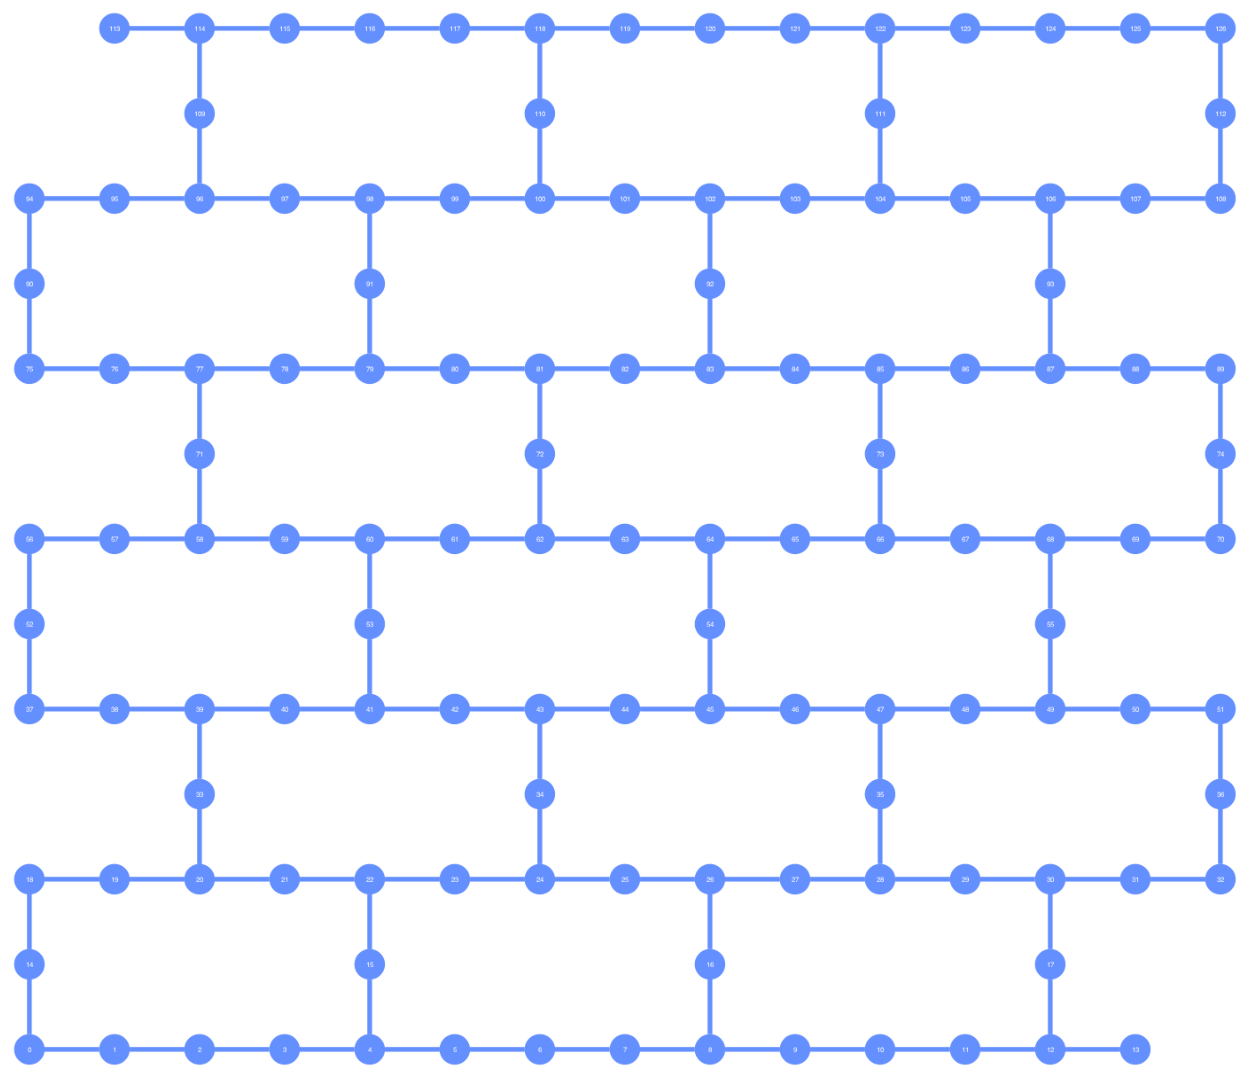

In [69]:
plot_gate_map(backend)

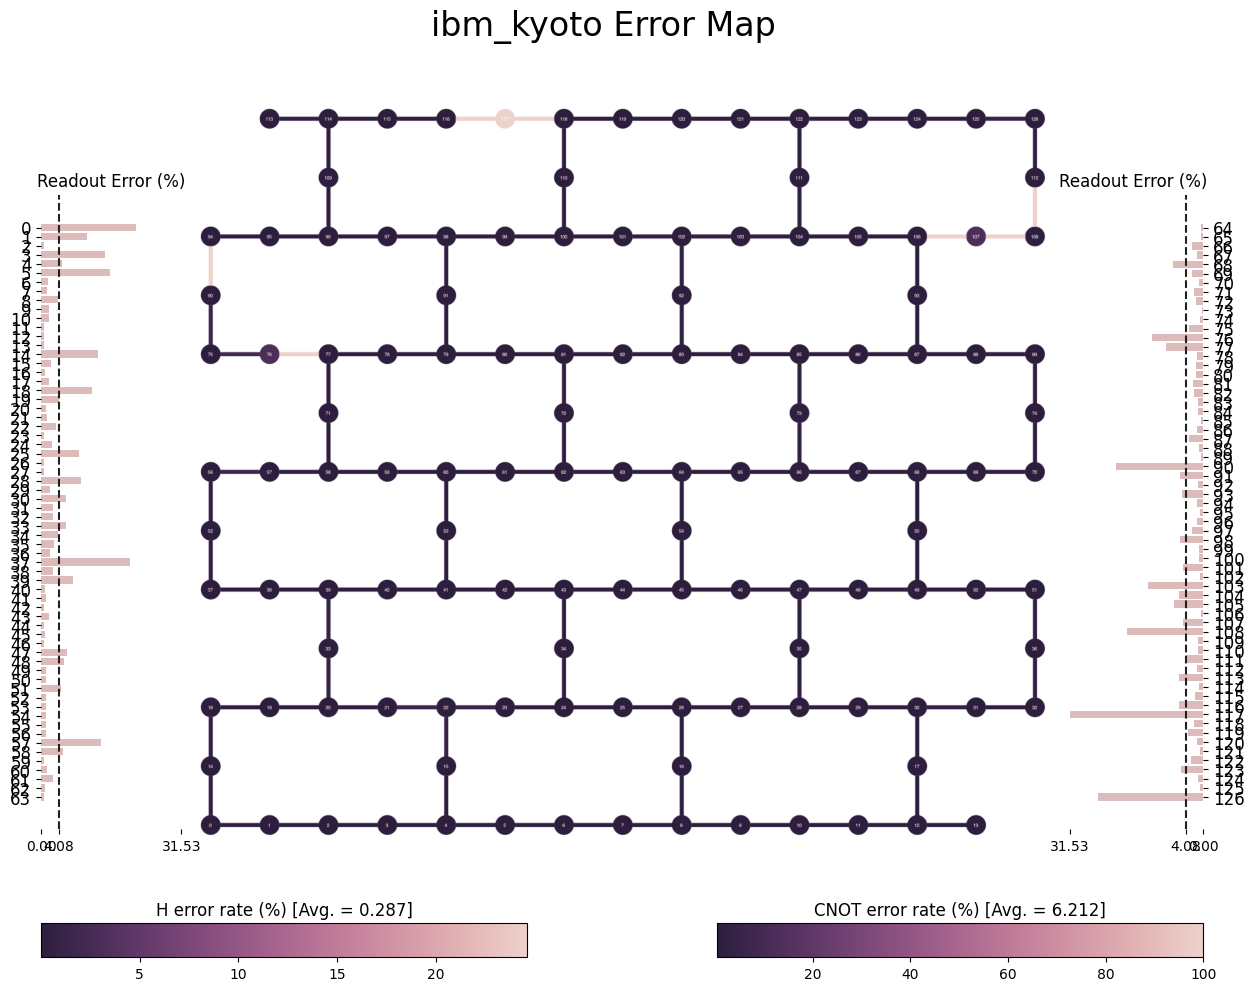

In [70]:
plot_error_map(backend)

For simulations we import the dedicated simulation element of Qiskit, Aer.

In [71]:
%pip install qiskit-aer

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [72]:
from qiskit_aer import Aer

In [73]:
for backend in Aer.backends():
    print(backend.name)

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator


Each of these has its use (some are duplicates), and we'll explore some of these uses more deeply later in this course.

## Hello, Quantum

Now we present a few examples to get you started with the syntax. As a first task, we write the commands to produce the quantum circuit represented in the figure below.

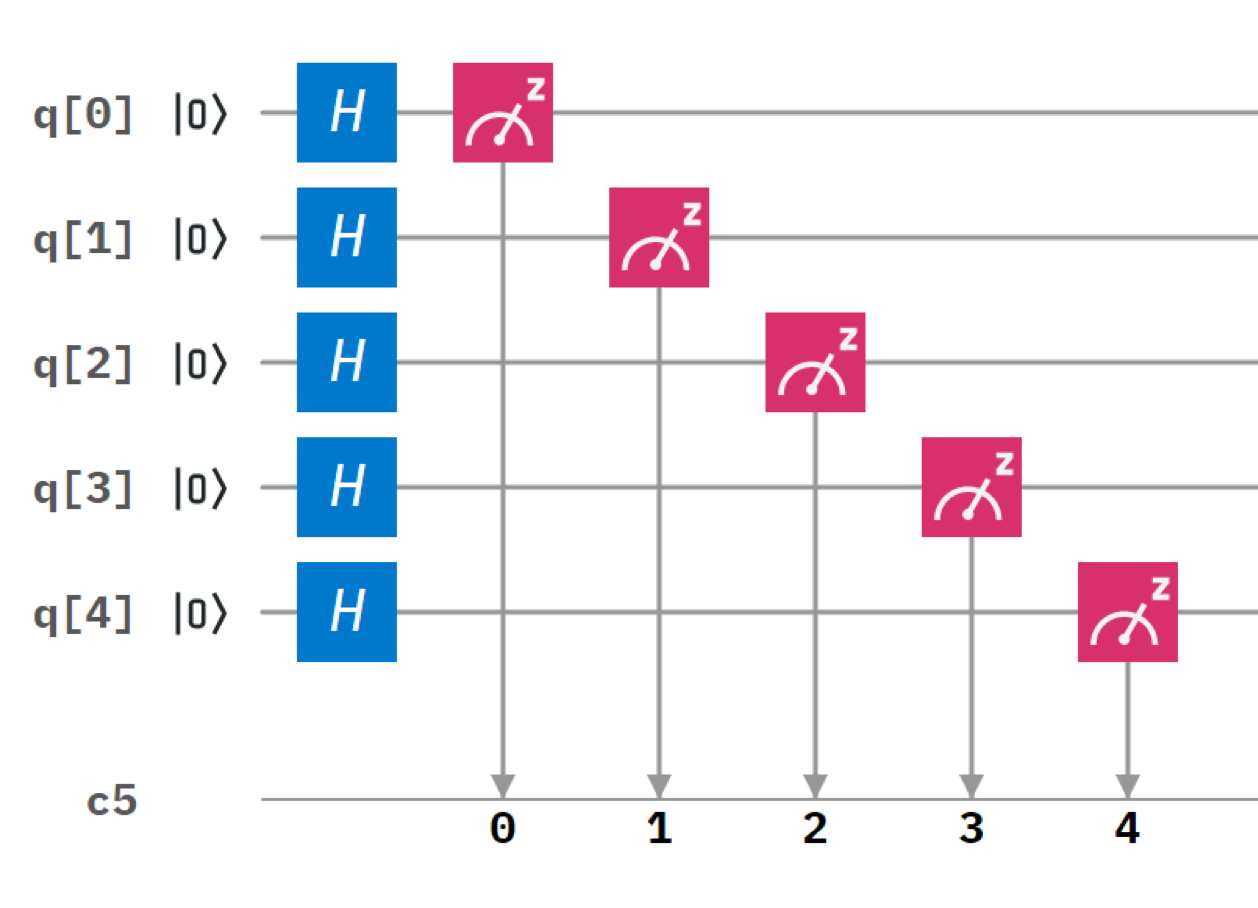

In [132]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer

In [133]:
q = QuantumRegister(5)      # Create a quantum register with 5 qubits.

c = ClassicalRegister(5)    # Create a classical register with 5 bits.
qc = QuantumCircuit(q, c)   # Create a quantum circuit, combining q and c.

In [134]:
qc.h(q)                     # Apply Hadamard gates to each of the qubits.
# qc is the name of the circuit, h is a method in this case but it's a gate, and q is the register we're applying the gates over
qc.measure(q,c)             # Measure all qubits and put the outcomes in c.
# args are things measured, and where to put the results

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


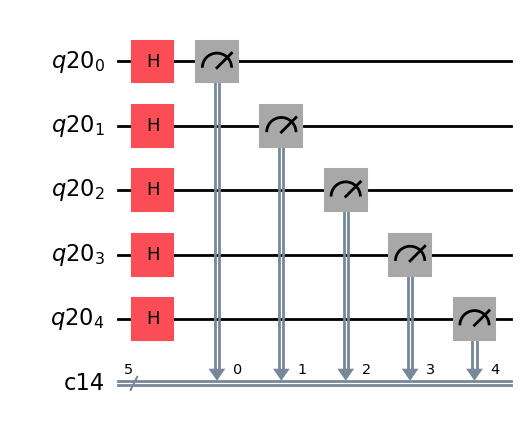

In [135]:
%pip install pylatexenc
qc.draw()
qc.draw(output='mpl')

In [136]:
backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

#We can call each of these individually as below or combine them in a single line as at the bottom of this cell

job = backend.run(qc,shots=1024)
# default is 1024, but you can change it to preference
results = job.result()
counts = results.get_counts(qc)

#counts=backend.run(qc,shots=1024).result().get_counts(qc)

print(counts)   # Print the observed counts for each outcome.

{'11011': 25, '01011': 44, '01001': 20, '11110': 25, '01100': 23, '11100': 38, '10011': 30, '01110': 41, '10101': 30, '00101': 32, '11001': 37, '10000': 26, '10010': 35, '00000': 30, '00010': 37, '00111': 41, '10100': 31, '01111': 29, '11111': 32, '11101': 34, '00110': 33, '10110': 34, '01101': 37, '10111': 38, '01010': 23, '11000': 17, '01000': 36, '10001': 35, '00011': 26, '11010': 22, '00001': 41, '00100': 42}


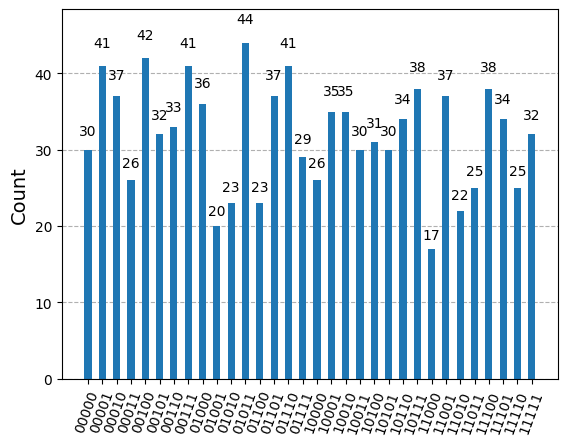

In [137]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Unitary Example

In [160]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
import numpy as np

In [161]:
q = QuantumRegister(2)      # Create a quantum register with 2 qubits.
c = ClassicalRegister(2)    # Create a classical register with 2 bits.
qc = QuantumCircuit(q, c)   # Create a quantum circuit, combining q and c.

In [162]:
qc.h(q[1])
qc.u(np.pi/2,np.pi/6,np.pi/12,q[1])      # Apply Unitary to one of the qubits.
qc.measure(q,c)             # Measure all qubits and put the outcomes in c.

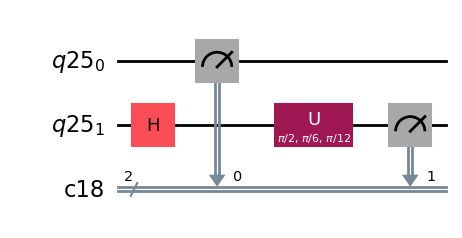

In [163]:
qc.draw('mpl')

In [164]:
backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

job = backend.run(qc)
results = job.result()
counts = results.get_counts(qc)

#counts=backend.run(qc).result().get_counts(qc)

In [165]:
print(counts)   # Print the observed counts for each outcome.

{'00': 17, '10': 1007}


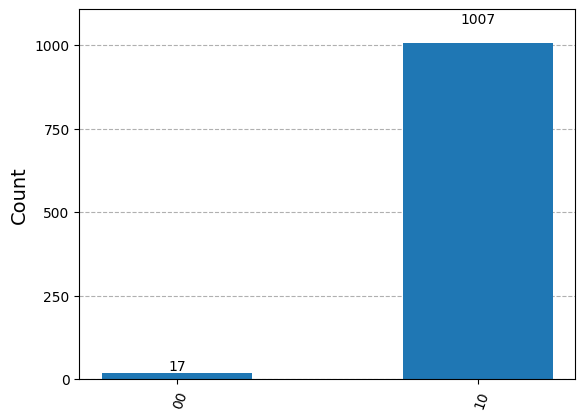

In [166]:
plot_histogram(counts)

## Hello, Entanglement!

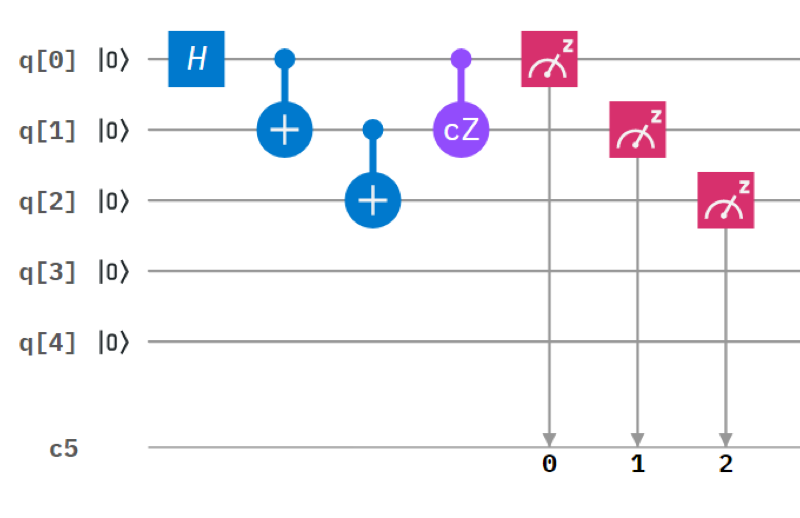

In [167]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [219]:
q = QuantumRegister(3)      #Quantum register with 3 qubits.
c = ClassicalRegister(3)    # Classical register with 3 bits.
qc = QuantumCircuit(q, c)   # Create a quantum circuit.

In [220]:
qc.h(q[0])          # Apply Hadamard gates to qubit 0.
qc.cx(q[0],q[1])    # Apply a CNOT from qubit 0 to qubit 1.
qc.cx(q[1],q[2])    # Apply a CNOT from qubit 0 to qubit 2.
qc.cz(q[0],q[1])    # Apply a CZ from qubit 0 to qubit 1.
qc.measure(q,c)     # Measure all qubits and put the outcomes in c.

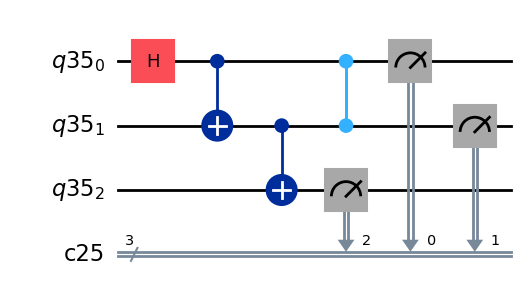

In [221]:
qc.draw('mpl')

In [205]:
backend = Aer.get_backend('qasm_simulator')

In [206]:
job = backend.run(qc)
result = job.result()
counts=result.get_counts(qc)
print(counts)

{'111': 519, '000': 505}


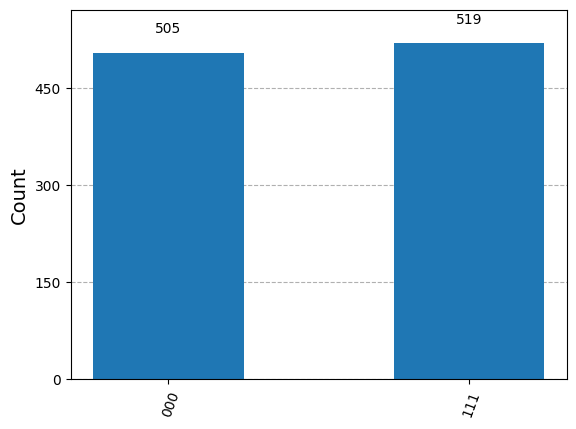

In [207]:
plot_histogram(counts)

### Other Gates

In [208]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)

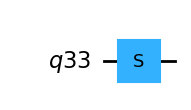

In [209]:
qc.s(q)
qc.draw('mpl')

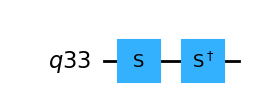

In [210]:
qc.sdg(q)
qc.draw('mpl')

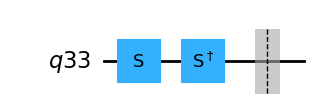

In [211]:
qc.barrier(q)
qc.draw('mpl')

## <font color=green>Exercise: Your turn to create a quantum circuit</font>

### Quantum Teleportation, kind of

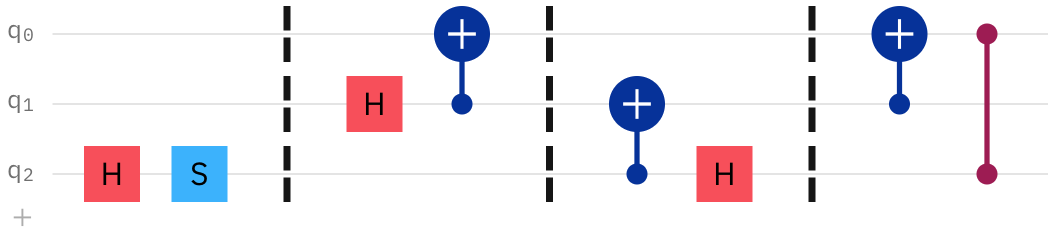

1. Use Qiskit to implement the protocol depicted above.
2. Verify that q[2] was correctly sent to q[0].  (How?)
3. __Interpret your results__.

4. Prepare a random qubit state using u(theta, phi, lambda) and teleport that state.

(__Note__: “lambda” is a reserved word in Python – don’t use it as a variable!)

In [262]:
q = QuantumRegister(3)  #3 qubits
c = ClassicalRegister(1) #only need one classical bit
qc = QuantumCircuit(q,c) #combine q and c into a quantum circuit

In [263]:
#First, initialize the state we want to send
qc.h(q[2])
qc.s(q[2])
qc.barrier(q)


#Then, initialize the Bell pair we will use as a resource
qc.h(q[1])
qc.cx(q[1],q[0])
qc.barrier(q)


#Now, we perform the correlating part of the Bell State Measurement

qc.cx(q[2],q[1])
qc.h(q[2])
qc.barrier(q)

#In place of measuring and then doing conditional gates, make the corrections controlled on q1 and q2!
qc.cx(q[1],q[0])
qc.cz(q[2],q[0])

qc.barrier(q)

#Finally, measure in the appropriate basis
qc.sdg(q[0])

qc.h(q[0])
qc.measure(q[0],c[0])

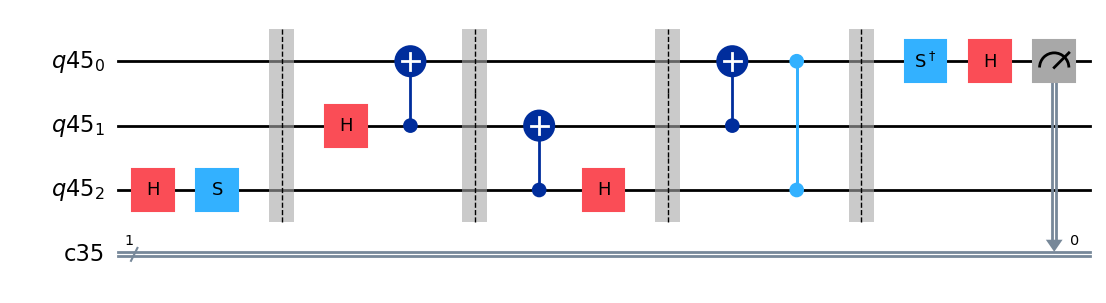

In [264]:
qc.draw('mpl')

In [265]:
backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

job = backend.run(qc)
results = job.result()
counts = results.get_counts(qc)

#counts=backend.run(qc).result().get_counts(qc)

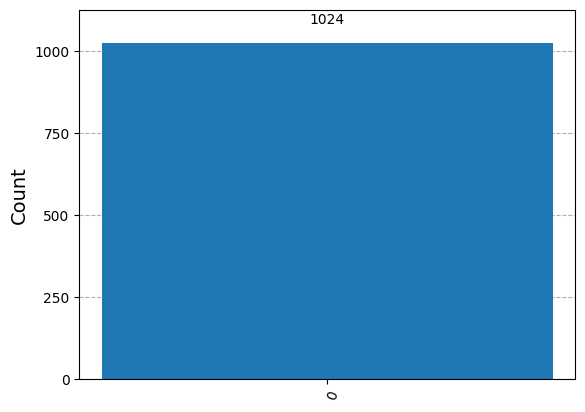

In [266]:
plot_histogram(counts)

In [275]:
#First, initialize the state we want to send
q = QuantumRegister(3)  #3 qubits
c = ClassicalRegister(1) #only need one classical bit
qc = QuantumCircuit(q,c) #combine q and c into a quantum circuit
phi = np.random.rand()*np.pi
theta = np.random.rand()*2*np.pi
lam = np.random.rand()*2*np.pi

qc.u(theta,phi,lam,q[2])

qc.barrier(q)


#Then, initialize the Bell pair we will use as a resource
qc.h(q[1])
qc.cx(q[1],q[0])
qc.barrier(q)


#Now, we perform the correlating part of the Bell State Measurement

qc.cx(q[2],q[1])
qc.h(q[2])
qc.barrier(q)

#In place of measuring and then doing conditional gates, make the corrections controlled on q1 and q2!
qc.cx(q[1],q[0])
qc.cz(q[2],q[0])

qc.barrier(q)

#Finally, measure in the appropriate basis
qc.u(-theta,-lam,-phi,q[0])
qc.measure(q[0],c[0])

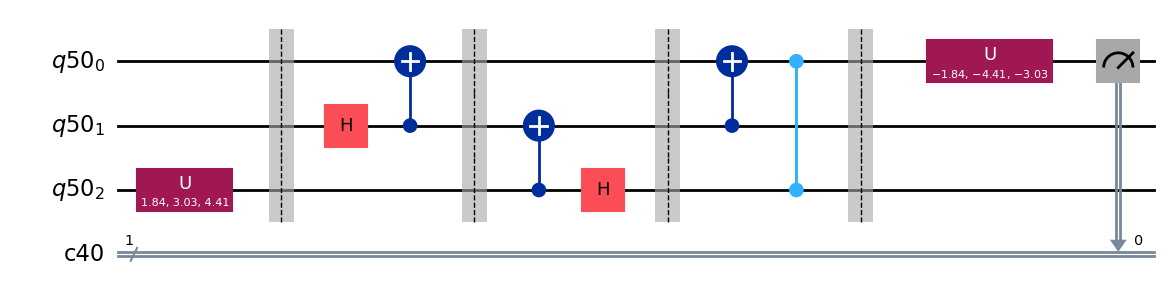

In [276]:
qc.draw('mpl')

{'0': 1024}


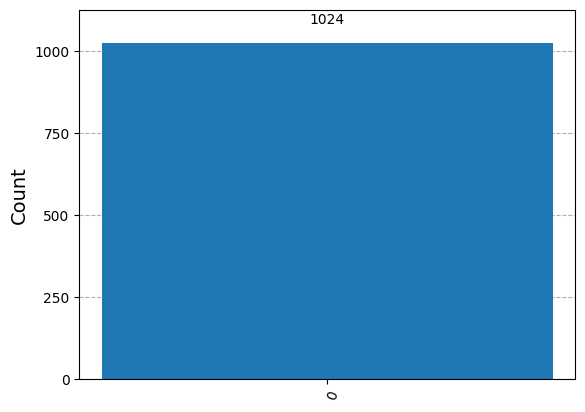

In [277]:
backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

#We can call each of these individually as below or combine them in a single line as at the bottom of this cell

job = backend.run(qc,shots=1024)
# default is 1024, but you can change it to preference
results = job.result()
counts = results.get_counts(qc)

#counts=backend.run(qc,shots=1024).result().get_counts(qc)

print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)
# plotting
